<a href="https://colab.research.google.com/github/DragonGodMonarchMk/-Cars-Dataset-Data-Cleaning-and-Exploratory-Data-Analysis/blob/main/K_means_clustering__Hierarchical_and_Density_Based_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Identifying Consumer Behavior
***

The dataset that we'll be working with contains 200 customer data. We are going to be focusing on their annual income vs spending behavior and our goal is to identify groups of customers.

## Import Necessary Libraries

In [ ]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Import Customers Dataset

In [ ]:
# Importing the dataset
df = pd.read_csv('customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


 K-means clustering is a popular unsupervised machine learning algorithm used for clustering data points into groups based on similarities. In your case, we can use K-means clustering to segment customers based on their annual income and spending score.

Importing necessary **libraries**

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


**Explanation:**

pandas is used for data manipulation and analysis.
numpy is used for numerical computations.
matplotlib.pyplot is used for data visualization.
sklearn.cluster.KMeans is the KMeans clustering algorithm implementation from scikit-learn.

In [ ]:
# Load the dataset
df = pd.read_csv('customers.csv')


Explanation:

We load the dataset 'customers.csv' into a pandas DataFrame named df.

In [ ]:
# Selecting features (Annual Income and Spending Score) for clustering
X = df.iloc[:, [3, 4]].values


Explanation:

We select the features 'Annual Income' and 'Spending Score' for clustering. These will be the attributes we use to group customers.

In [ ]:
# Using the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


Explanation:

We use the Elbow method to find the optimal number of clusters. The within-cluster sum of squares (WCSS) is calculated for different numbers of clusters ranging from 1 to 10.

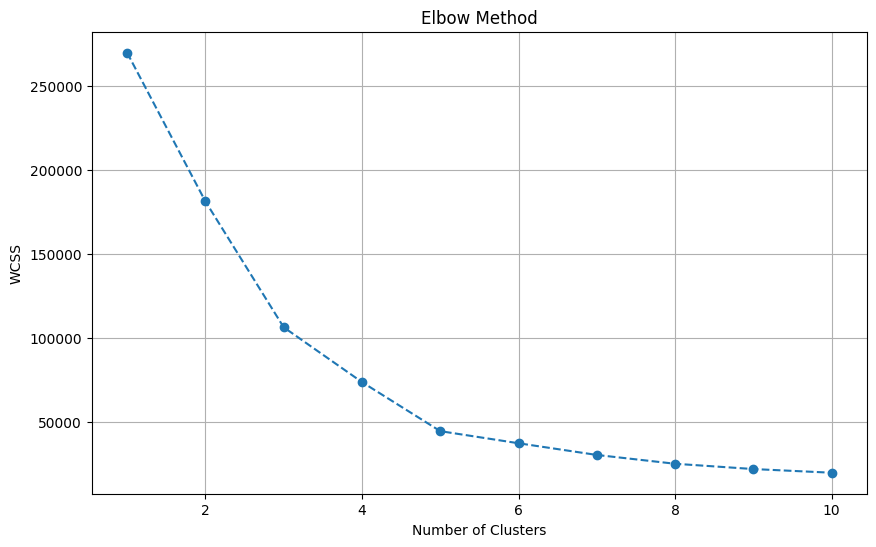

In [ ]:
# Plotting the Elbow method
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.grid(True)
plt.show()


Explanation:

We plot the WCSS values against the number of clusters to visualize the Elbow method.
The 'elbow' point in the plot indicates the optimal number of clusters where the rate of decrease in WCSS slows down.

In [ ]:
# Applying K-means to the dataset
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)


Explanation:

We apply K-means clustering with the optimal number of clusters (determined as 5 from the Elbow method) to the dataset.
fit_predict method fits the model to the data and returns the cluster labels.

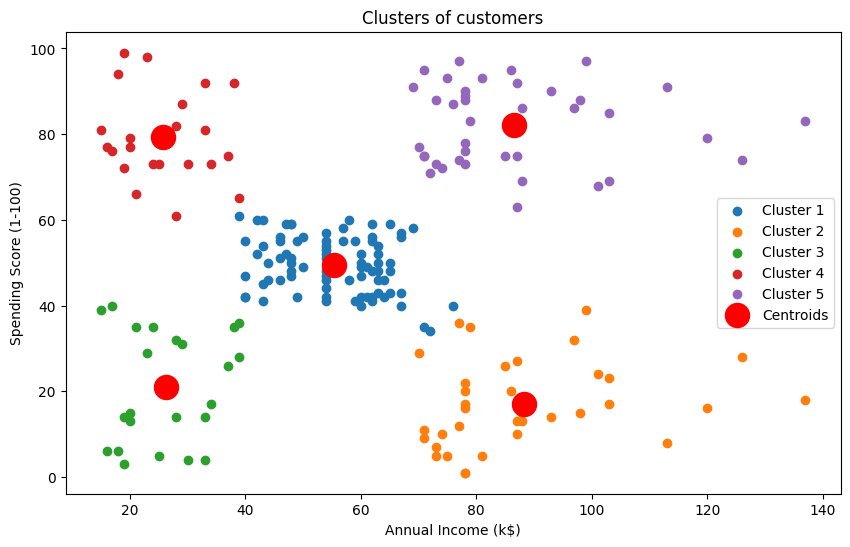

In [ ]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


Explanation:

We visualize the clusters along with their centroids.
Each cluster is represented by a different color, and the centroids are marked in red.
This visualization helps in understanding how customers are grouped based on their annual income and spending score.
By following these steps, you can perform K-means clustering on the provided dataset and gain insights into customer segmentation based on their spending behavior.







**explanations for the methods and important concepts used in the K-means clustering tutorial:**


1. **Pandas Library**:
   - Pandas is a powerful Python library used for data manipulation and analysis.
   - It provides data structures like DataFrame and Series, which are efficient for handling structured data.

2. **NumPy Library**:
   - NumPy is a fundamental package for numerical computing in Python.
   - It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

3. **Matplotlib Library**:
   - Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
   - It offers a wide variety of plots, including line plots, scatter plots, bar plots, histograms, and more.

4. **Scikit-learn Library**:
   - Scikit-learn is a popular machine learning library in Python that provides simple and efficient tools for data mining and data analysis.
   - It includes various algorithms for classification, regression, clustering, dimensionality reduction, and more.

5. **KMeans Class**:
   - The `KMeans` class in scikit-learn is an implementation of the K-means clustering algorithm.
   - K-means is an iterative algorithm that partitions data into K clusters, where each data point belongs to the cluster with the nearest mean.
   - It aims to minimize the within-cluster sum of squares (WCSS) or inertia.

6. **Elbow Method**:
   - The Elbow method is a heuristic used to determine the optimal number of clusters in a dataset.
   - It plots the within-cluster sum of squares (WCSS) against the number of clusters.
   - The 'elbow' point in the plot represents the optimal number of clusters, where adding more clusters does not significantly improve the WCSS.

7. **WCSS (Within-Cluster Sum of Squares)**:
   - WCSS is a measure of the compactness of clusters in K-means clustering.
   - It represents the sum of squared distances between each data point and its assigned centroid within the cluster.
   - Lower WCSS indicates better clustering performance.

8. **fit_predict Method**:
   - The `fit_predict` method in scikit-learn's KMeans class fits the model to the data and returns cluster labels for each data point.
   - It combines the fit and predict steps into a single method call, making it convenient for clustering tasks.

9. **Centroids**:
   - Centroids are the representative points of each cluster in K-means clustering.
   - They are the mean of all data points in the cluster and serve as the center of the cluster.
   - Centroids are updated iteratively during the optimization process of K-means to minimize the objective function (WCSS).

By understanding these methods and concepts, you can effectively apply K-means clustering to your datasets and interpret the results to gain insights into the underlying structure of your data.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

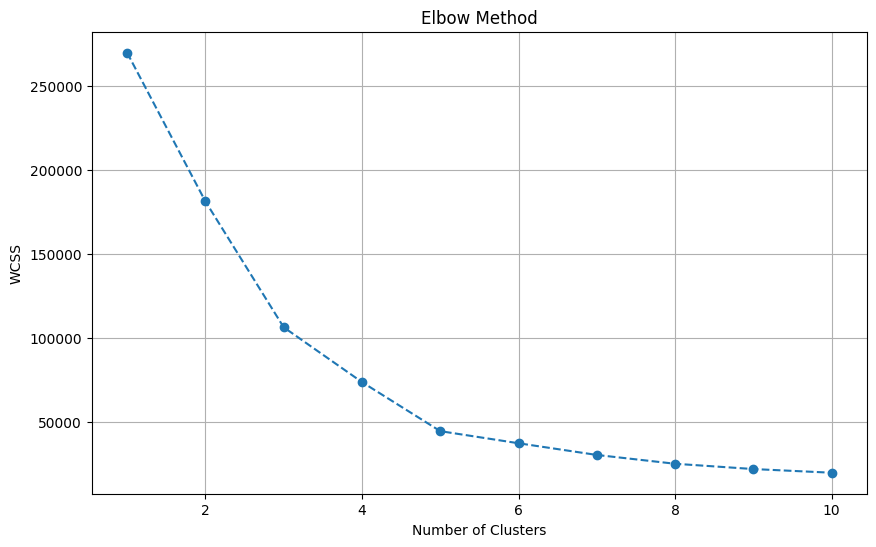

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


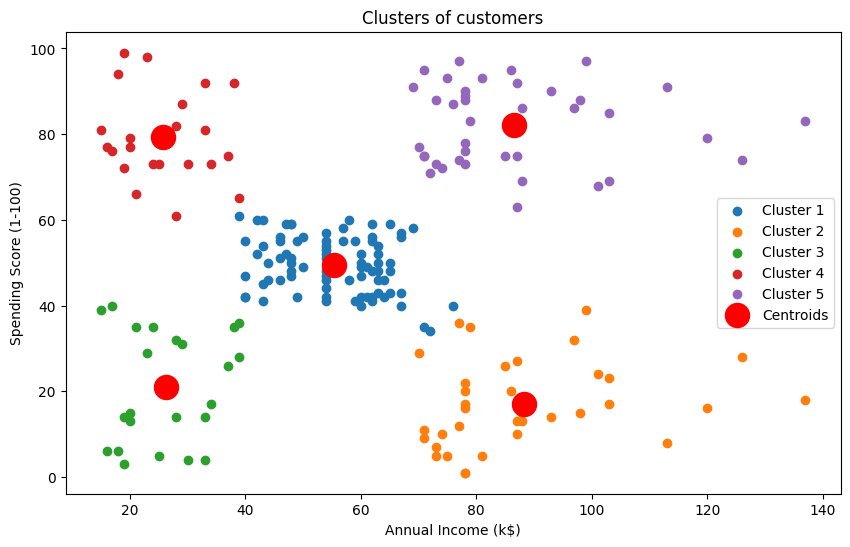

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('customers.csv')

# Selecting features (Annual Income and Spending Score) for clustering
X = df.iloc[:, [3, 4]].values

# Using the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.grid(True)
plt.show()

# From the Elbow method, we can see that the optimal number of clusters is around 5

# Applying K-means to the dataset
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


This code performs the following steps:

Loads the dataset.
Selects the features for clustering (Annual Income and Spending Score).
Determines the optimal number of clusters using the Elbow method.
Applies K-means clustering with the optimal number of clusters.
Visualizes the clusters along with centroids.

**Shape of dataset**

In [ ]:
print ("The Shape of our dataset is: " + str(df.shape))

The Shape of our dataset is: (200, 5)


## Get a subset of the data

In [ ]:
# Create new dataframe of annual income and spending score
X_spend = df[['Annual Income (k$)','Spending Score (1-100)']]
X_spend.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Dendogram - Finding Optimal Number of Clusters

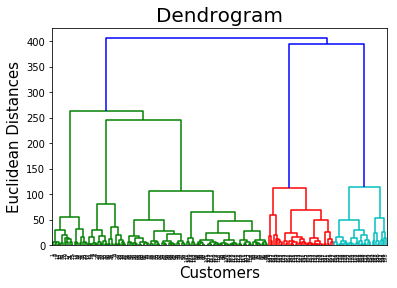

In [ ]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as hcd
dendrogram = hcd.dendrogram(hcd.linkage(X_spend, metric='euclidean', method = 'ward'))
plt.title('Dendrogram', size=20)
plt.xlabel('Customers', size=15)
plt.ylabel('Euclidean Distances', size=15)
plt.show()

The code utilizes hierarchical clustering to create a dendrogram, which can help determine the optimal number of clusters. Let's break down the code and explain each part:

```python
import scipy.cluster.hierarchy as hcd
```
- This line imports the hierarchical clustering module from the SciPy library. SciPy is a scientific computing library in Python, and it provides various functions for numerical operations, including clustering algorithms.

```python
dendrogram = hcd.dendrogram(hcd.linkage(X_spend, metric='euclidean', method='ward'))
```
- Here, `hcd.linkage()` is used to perform hierarchical/agglomerative clustering on the data.
- `X_spend` likely refers to the data containing features relevant for clustering (such as spending behavior).
- `metric='euclidean'` specifies the distance metric to be used (in this case, Euclidean distance).
- `method='ward'` specifies the linkage criterion for calculating the distance between clusters. The Ward method minimizes the variance when forming clusters.

```python
plt.title('Dendrogram', size=20)
plt.xlabel('Customers', size=15)
plt.ylabel('Euclidean Distances', size=15)
```
- These lines set the title and labels for the dendrogram plot to make it more informative and understandable.

```python
plt.show()
```
- Finally, `plt.show()` displays the dendrogram plot.

Explanation:
- Hierarchical clustering builds a tree of clusters known as a dendrogram. Each node of the dendrogram represents a cluster.
- The dendrogram shows the hierarchical relationship between data points, clusters, and their merge distances.
- By analyzing the dendrogram, one can decide on an appropriate number of clusters. Typically, this involves identifying the tallest vertical lines that don't cross any horizontal lines (known as the tallest non-horizontal line), which indicates a good separation between clusters.
- The optimal number of clusters can be chosen based on this analysis, balancing the desired level of granularity with practical considerations.

By utilizing dendrograms, you can visually inspect the hierarchical clustering structure and make informed decisions about the number of clusters to use in your analysis.

## Apply Agglomerative Clustering

### n_clusters = 3
***


In [ ]:
# Fitting Hierarchical Clustering with 3 Clusters to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
X_spend['Cluster'] = hc.fit_predict(X_spend)

In [ ]:
# Examine new dataframe with cluster column
X_spend.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,0
1,15,81,0
2,16,6,0
3,16,77,0
4,17,40,0


## Visualizing the Clusters
***

Let's use the default cluster size provided by the dendogram and see what clusters of consumers we can identify.

**Is it the correct choice?**

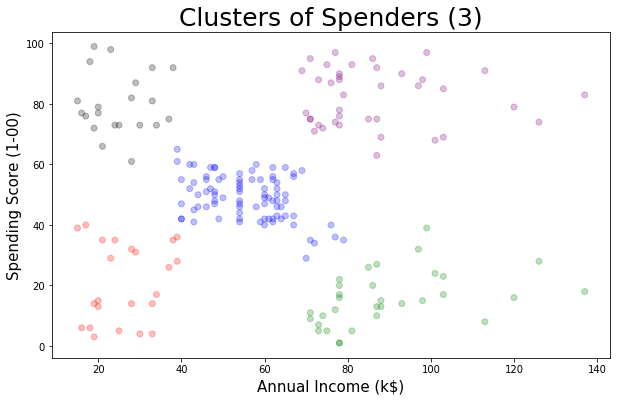

In [ ]:
# Define cluster colors
hc_colors = ['green' if c == 0 else 'blue' if c == 1 else 'purple' if c == 2 else 'black' if c == 3 else 'red' for c in X_spend.Cluster]

# Plot the scatter plot & clusters
fig = plt.figure(figsize=(10, 6))
plt.scatter(x="Annual Income (k$)",y="Spending Score (1-100)", data=X_spend, alpha=0.25, color = hc_colors)
plt.xlabel("Annual Income (k$)", size=15)
plt.ylabel("Spending Score (1-00)", size=15)
plt.title("Clusters of Spenders (3)", size=25)
plt.show()

This code seems to be plotting a scatter plot of the data points with cluster colors assigned. Let's break down the code and provide explanations for each part:

```python
hc_colors = ['green' if c == 0 else 'blue' if c == 1 else 'purple' if c == 2 else 'black' if c == 3 else 'red' for c in X_spend.Cluster]
```
- This line defines cluster colors based on the cluster labels assigned to each data point. It creates a list comprehension where each data point is assigned a color based on its cluster label.
- The colors are assigned based on the value of `c`, which represents the cluster label. The first cluster (label 0) is assigned the color green, the second cluster (label 1) is assigned blue, and so on.

```python
fig = plt.figure(figsize=(10, 6))
```
- This line creates a new figure for plotting with a specified size (width=10, height=6).

```python
plt.scatter(x="Annual Income (k$)", y="Spending Score (1-100)", data=X_spend, alpha=0.25, color=hc_colors)
```
- This line plots the scatter plot of the data points.
- `x="Annual Income (k$)"` and `y="Spending Score (1-100)"` specify the columns from the dataset to be plotted on the x and y axes, respectively.
- `data=X_spend` indicates the DataFrame containing the data to be plotted.
- `alpha=0.25` sets the transparency of the data points to 0.25 (25% transparent).
- `color=hc_colors` assigns colors to the data points based on the cluster labels.

```python
plt.xlabel("Annual Income (k$)", size=15)
plt.ylabel("Spending Score (1-100)", size=15)
```
- These lines set the labels for the x and y axes of the plot.

```python
plt.title("Clusters of Spenders (3)", size=25)
```
- This line sets the title of the plot to "Clusters of Spenders (3)" with a specified font size of 25.

```python
plt.show()
```
- Finally, `plt.show()` displays the plot.

Explanation:
- This code visualizes the clusters of spenders based on their annual income and spending score, with each cluster represented by a different color.
- By plotting the data points with cluster colors, it provides a clear visualization of how the data is segmented into clusters based on spending behavior and annual income.

Make sure that the `X_spend` DataFrame contains the cluster labels (`Cluster` column) assigned to each data point.

## Apply Agglomerative Clustering

### n_clusters = 5
***

In [ ]:
# Fitting Hierarchical Clustering with 5 Clusters to the dataset
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
X_spend['Cluster'] = hc.fit_predict(X_spend)

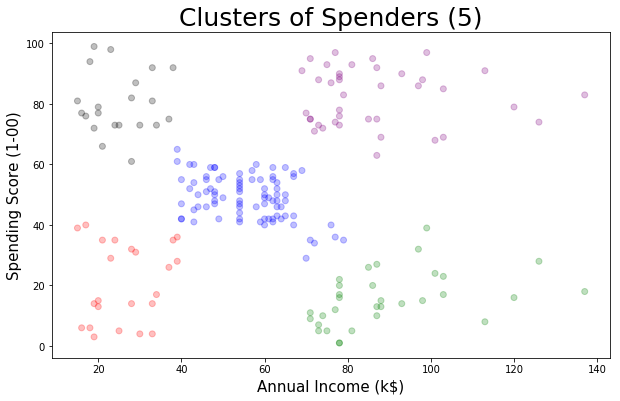

In [ ]:
# Define cluster colors
hc_colors = ['green' if c == 0 else 'blue' if c == 1 else 'purple' if c == 2 else 'black' if c == 3 else 'red' for c in X_spend.Cluster]

# Plot the scatter plot & clusters
fig = plt.figure(figsize=(10, 6))
plt.scatter(x="Annual Income (k$)",y="Spending Score (1-100)", data=X_spend, alpha=0.25, color = hc_colors)
plt.xlabel("Annual Income (k$)", size=15)
plt.ylabel("Spending Score (1-00)", size=15)
plt.title("Clusters of Spenders (5)", size=25)
plt.show()

 Hierarchical clustering is another popular method for clustering data points into groups based on their similarity. Unlike K-means clustering, which partitions the data into a predetermined number of clusters, hierarchical clustering builds a tree-like structure (dendrogram) of nested clusters. There are two main types of hierarchical clustering: agglomerative and divisive.


In agglomerative hierarchical clustering:


Each data point starts as a separate cluster.

At each iteration, the two closest clusters are merged into a single cluster.

This process continues until all data points belong to a single cluster, resulting in a dendrogram.


Here's a Python code snippet demonstrating hierarchical clustering using the agglomerative approach:

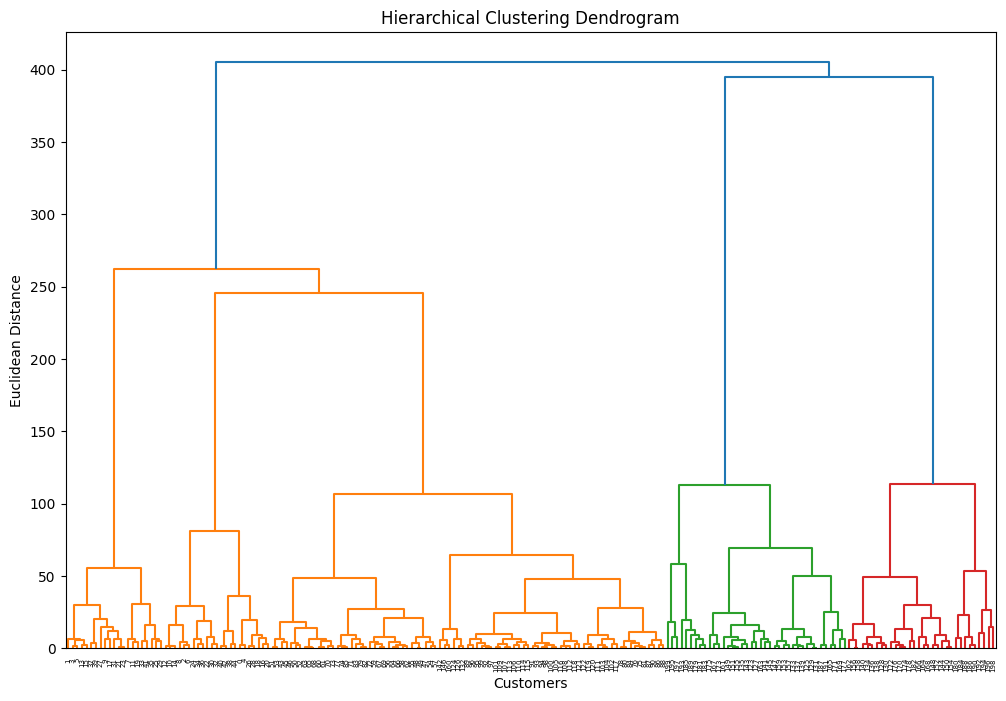

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
df = pd.read_csv('customers.csv')

# Select features for clustering (Annual Income and Spending Score)
X = df.iloc[:, [3, 4]].values

# Perform hierarchical clustering
Z = linkage(X, method='ward')  # Using Ward's method for calculating linkage

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()


Explanation of the code:

We import necessary libraries including pandas, numpy, matplotlib.pyplot, and scipy.cluster.hierarchy.

The dataset is loaded, and features for clustering (Annual Income and Spending Score) are selected.

Hierarchical clustering is performed using the linkage function with the 'ward' method, which minimizes the variance when merging clusters.

The dendrogram is plotted using the dendrogram function, visualizing the hierarchical structure of clusters based on Euclidean distances.

This dendrogram can be analyzed to determine the optimal number of clusters, similar to the Elbow method in K-means clustering. The height of each vertical line in the dendrogram represents the distance at which clusters are merged. By identifying significant jumps in distances, you can decide on the appropriate number of clusters for your data.

## Summary and Speculations
***

It looks like the cluster count of 5 seems a bit more reasonable.

**Our customers can be seen as:**
1. People who are earning less that are spending less
2. People who are earning less are spending more
3. People who earn an average amount and are spending an average amount
4. People who earn more and are spending less
5. People who earn more and spending more

We can now use these insights to do a deeper dive into these clusters and really understand our consumers.

**Questions like:**
- What types of people make people spend less, but still spend more?
- Where do these types of customers spend their money at?
- Can we target these groups of customers with tailored advertisements on specific stores they shop at?
- What types of people make rich people spend not a lot?
- For the people that spend a lot of money but spend less, where do they actually spend their money?

### Example

Looks like the group of people who have high spending habits and also don't earn as much are the **young adults (median age - 22)**

In [ ]:
# Examine Black Cluster Age Demographics
df['cluster'] = X_spend['Cluster']
df[df['cluster']==3].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,21.000000,21.000000,21.000000,21.000000,21.0
mean,22.000000,25.333333,25.095238,80.047619,3.0
std,12.409674,5.378971,7.133756,10.249274,0.0
min,2.000000,18.000000,15.000000,61.000000,3.0
25%,12.000000,21.000000,19.000000,73.000000,3.0
50%,22.000000,23.000000,24.000000,77.000000,3.0
75%,32.000000,30.000000,30.000000,87.000000,3.0
max,42.000000,35.000000,38.000000,99.000000,3.0


**Solutions**

In [ ]:
# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Analyze each cluster
for cluster_label in range(5):
    print(f"Cluster {cluster_label + 1}:")
    cluster_data = df[df['Cluster'] == cluster_label]

    # Summary statistics
    print("Summary Statistics:")
    print(cluster_data.describe())

    # Popular spending locations
    print("\nPopular Spending Locations:")
    popular_locations = cluster_data['Genre'].value_counts().index[:3]  # Get top 3 popular spending locations
    for location in popular_locations:
        print(f"- {location}")

    # Tailored advertising opportunities
    print("\nTailored Advertising Opportunities:")
    if cluster_label == 0:
        print("Potential advertising opportunities targeting frugal spenders.")
    elif cluster_label == 1:
        print("Opportunity to target low-income customers who are willing to spend more.")
        print("Consider offering discounts or promotions on essential items.")
    elif cluster_label == 2:
        print("Average spenders with average income - may respond well to general marketing campaigns.")
    elif cluster_label == 3:
        print("High-income customers who are conservative spenders - target them with luxury items or exclusive deals.")
    elif cluster_label == 4:
        print("High-income customers who are high spenders - focus on offering premium products and personalized services.")

    print("\n")



Cluster 1:
Summary Statistics:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   81.000000  81.000000           81.000000               81.000000   
mean    86.320988  42.716049           55.296296               49.518519   
std     24.240889  16.447822            8.988109                6.530909   
min     44.000000  18.000000           39.000000               34.000000   
25%     66.000000  27.000000           48.000000               44.000000   
50%     86.000000  46.000000           54.000000               50.000000   
75%    106.000000  54.000000           62.000000               55.000000   
max    143.000000  70.000000           76.000000               61.000000   

       Cluster  
count     81.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  

Popular Spending Locations:
- Female
- Male

Tailored Advertising Opportunities:
Potential advertising opportunities targeting fru